## 8. Zooming Images

In [23]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [24]:
# Function to zoom an image by a given factor and interpolation method
def zoom_image(img, scale, interpolation):
    height, width = img.shape[:2]
    new_size = (int(width * scale), int(height * scale))
    return cv.resize(img, new_size, interpolation=interpolation)

In [25]:
# Function to Compute normalized sum of squared differences between two images.
def compute_normalized_ssd(img1, img2):
    #Both images must be the same size.
    assert img1.shape == img2.shape, "Images must be the same size for SSD computation."
    diff = img1.astype(np.float32) - img2.astype(np.float32)
    ssd = np.sum(diff ** 2)
    return ssd / img1.size

In [26]:
# Function to test zooming and SSD calculation for a given image pair
def test_zoom_and_compare(original_path, small_path, scale_factor=4):
    # Read images
    original = cv.imread(original_path)
    small = cv.imread(small_path)
    assert original is not None, f"Cannot read {original_path}"
    assert small is not None, f"Cannot read {small_path}"

    # Zoom using nearest neighbor and bilinear interpolation
    zoomed_nn = zoom_image(small, scale_factor, cv.INTER_NEAREST)
    zoomed_bilinear = zoom_image(small, scale_factor, cv.INTER_LINEAR)

    # Ensure zoomed images match original size exactly
    zoomed_nn = cv.resize(zoomed_nn, (original.shape[1], original.shape[0]))
    zoomed_bilinear = cv.resize(zoomed_bilinear, (original.shape[1], original.shape[0]))

    # Compute SSD values
    nn_ssd = compute_normalized_ssd(original, zoomed_nn)
    bilinear_ssd = compute_normalized_ssd(original, zoomed_bilinear)

    # Print results
    print(f"Results for {original_path.split('/')[-1]}:")
    print(f"Normalized SSD (Nearest Neighbor): {nn_ssd}")
    print(f"Normalized SSD (Bilinear): {bilinear_ssd}")

    # Display results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB))
    plt.title("Nearest Neighbor")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB))
    plt.title("Bilinear")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Results for im01.png:
Normalized SSD (Nearest Neighbor): 136.26905822753906
Normalized SSD (Bilinear): 115.09185028076172


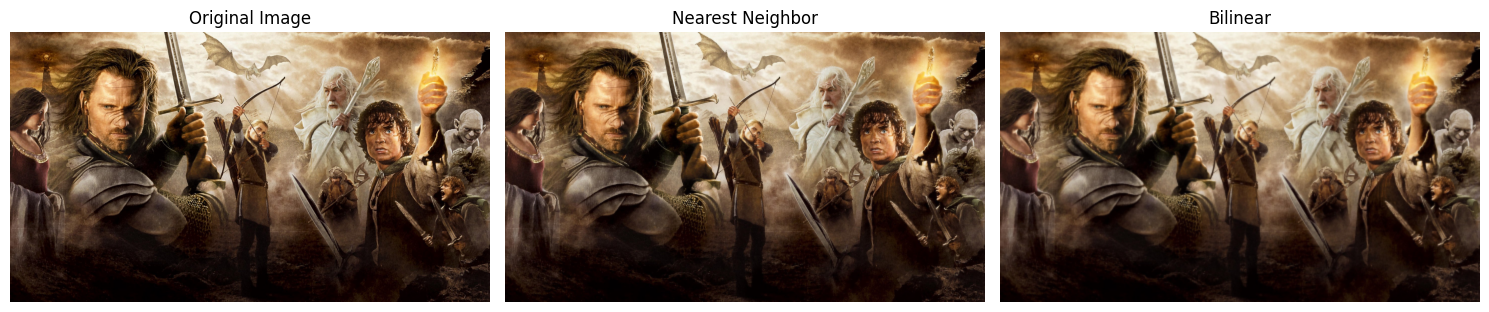

Results for im02.png:
Normalized SSD (Nearest Neighbor): 26.44607162475586
Normalized SSD (Bilinear): 18.345911026000977


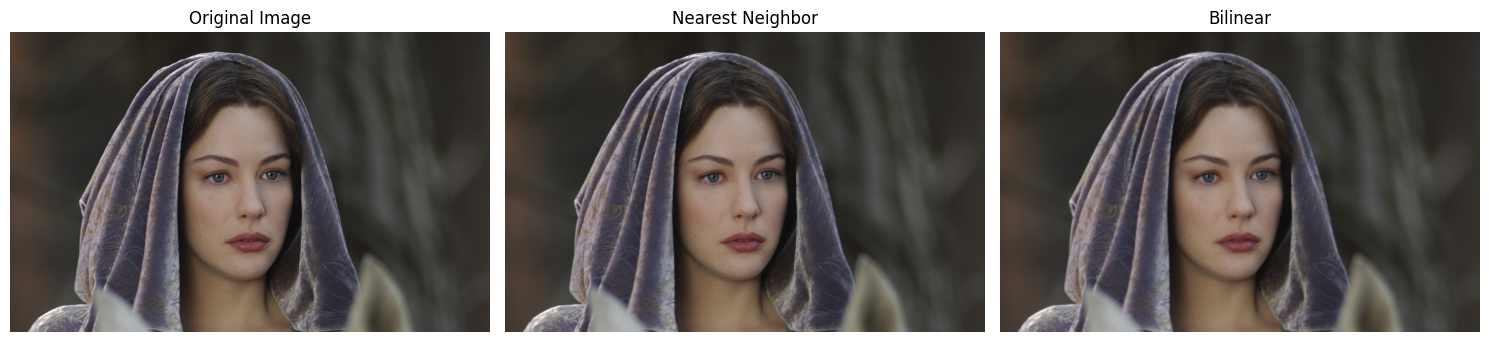

Results for im03.png:
Normalized SSD (Nearest Neighbor): 62.64076614379883
Normalized SSD (Bilinear): 49.877403259277344


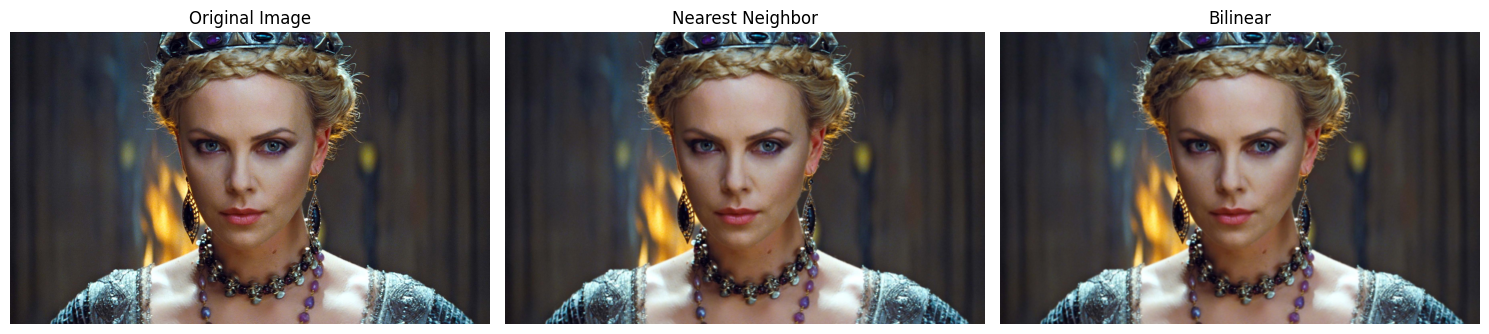

In [27]:
# Test for provided image pairs
test_zoom_and_compare('a1images/a1q5images/im01.png', 'a1images/a1q5images/im01small.png', scale_factor=4)
test_zoom_and_compare('a1images/a1q5images/im02.png', 'a1images/a1q5images/im02small.png', scale_factor=4)
test_zoom_and_compare('a1images/a1q5images/im03.png', 'a1images/a1q5images/im03small.png', scale_factor=4)

# Approach


A custom zoom function was implemented to enlarge images using nearest-neighbor and bilinear interpolation. The zoomed results were compared with the original high-resolution images by computing the normalized Sum of Squared Differences (SSD) to assess accuracy.

# Interpretation

Bilinear interpolation produced smoother results and a lower SSD, indicating closer similarity to the original, while nearest-neighbor showed blockier artifacts and a higher SSD.